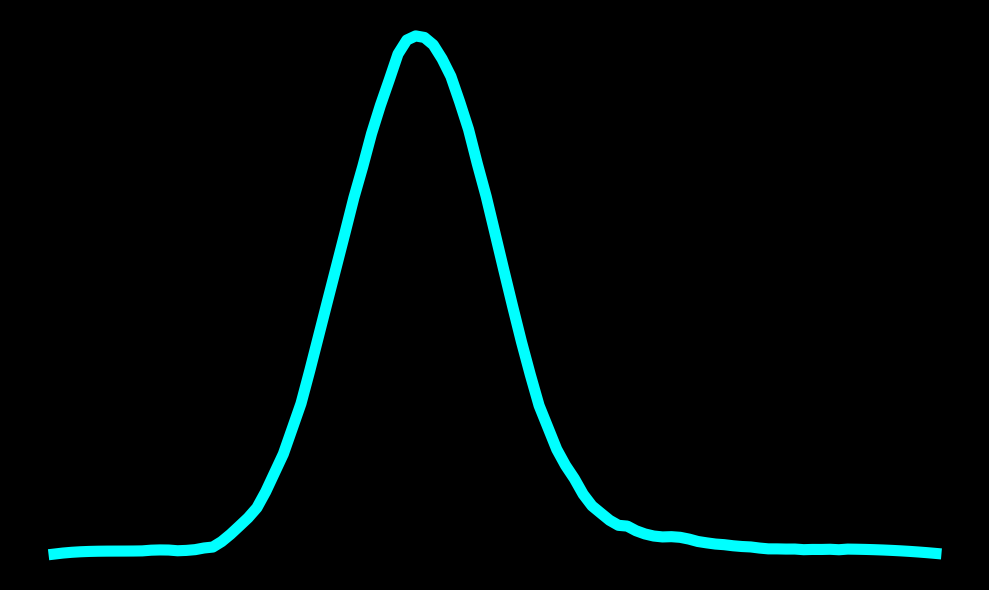

/tmp/ipykernel_238789/2836388688.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # Remove the legend


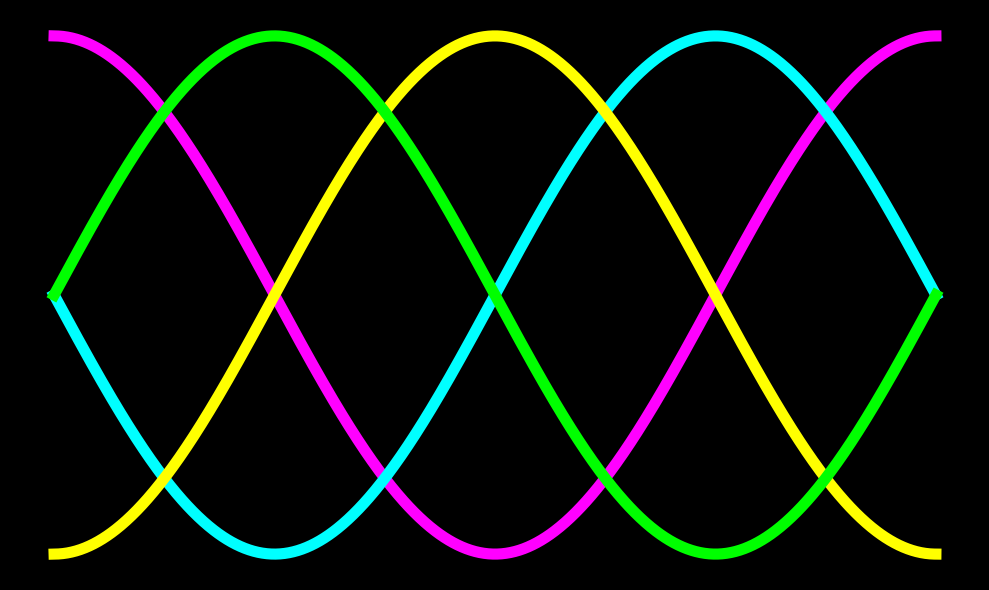

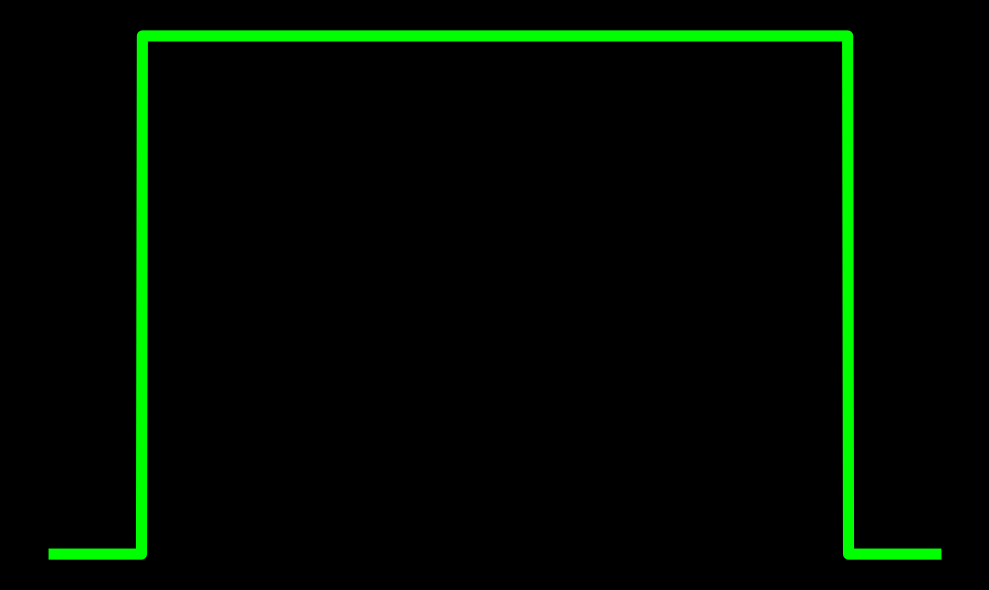

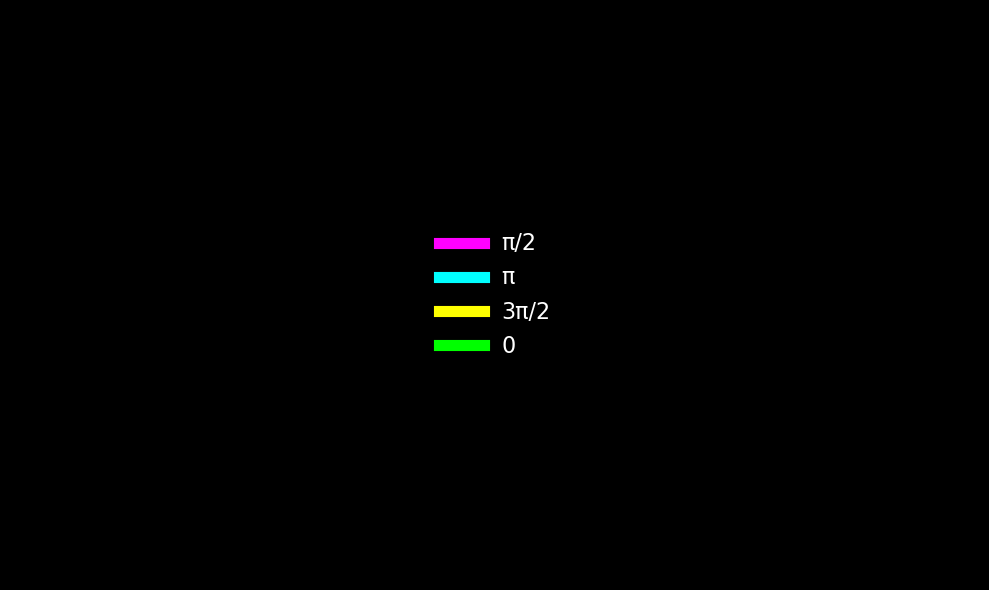

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import os

# Set style for all plots
plt.style.use('dark_background')

# 1. Load and plot the laser pulse shape with smoothing
pulse_path = '/scratch/ondemand28/battal/active-yobo/data/yobo/pulse.npy'
plt.figure(figsize=(10, 6))
if os.path.exists(pulse_path):
    pulse_data = np.load(pulse_path)
    time_axis = np.arange(len(pulse_data))
    
    # Apply smoothing using Savitzky-Golay filter
    smoothed_pulse = savgol_filter(pulse_data, window_length=21, polyorder=3)
    
    plt.plot(time_axis, smoothed_pulse, color='cyan', linewidth=8)
    
    # Remove all ticks and labels
    plt.xticks([])
    plt.yticks([])
    plt.title('')
    
    # Remove all spines
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
else:
    plt.text(0.5, 0.5, 'Pulse data file not found', 
             horizontalalignment='center', color='white')
plt.tight_layout()
plt.show()

# 2. Plot continuous wave time-of-flight sensor response with specified phase shifts
plt.figure(figsize=(10, 6))
t = np.linspace(0, 2*np.pi, 1000)
phase_shifts = [np.pi/2, np.pi, 3*np.pi/2, 0]
colors = ['magenta', 'cyan', 'yellow', 'lime']

for i, phase in enumerate(phase_shifts):
    if i != 3:
        continue

    cw_tof = np.sin(t + phase)
    plt.plot(t, cw_tof, color=colors[i], linewidth=8)

# Remove all ticks and labels
plt.xticks([])
plt.yticks([])
plt.title('')
plt.legend().remove()  # Remove the legend

# Remove all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tight_layout()
plt.show()

# 3. Plot conventional camera response (constant pulse shape - all ones)
plt.figure(figsize=(10, 6))
t = np.linspace(0, 10, 1000)

# Box/constant function with small rise and fall time
conventional = np.zeros_like(t)
mask = (t >= 1) & (t <= 9)
conventional[mask] = 1

plt.plot(t, conventional, color='lime', linewidth=8)

# Remove all ticks and labels
plt.xticks([])
plt.yticks([])
plt.title('')

# Remove all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.tight_layout()
plt.show()

# 4. Create a new plot with just the labels for CW-ToF
plt.figure(figsize=(10, 6))
plt.axis('off')  # Turn off the axis completely

# Create a legend-only plot
phase_shifts = [np.pi/2, np.pi, 3*np.pi/2, 0]
colors = ['magenta', 'cyan', 'yellow', 'lime']
labels = ['π/2', 'π', '3π/2', '0']

# Create invisible lines with labels for the legend
for i in range(len(phase_shifts)):
    plt.plot([], [], color=colors[i], linewidth=8, label=labels[i])

# Create the legend with large font size and clean style
legend = plt.legend(frameon=False, fontsize=16, loc='center', labelcolor='white')

# Remove the background
plt.tight_layout()
plt.show()